In [1]:
import datetime
import sys
import warnings

import jax
import jax.numpy as jnp
from get_model import get_model_and_data  # noqa: F401
from main import run_simple_lmc_numpyro  # noqa: F401
from numpyro.infer import MCMC, NUTS, Predictive  # noqa: F401
from progressive_full_run import run_progressive_logreg


%env JAX_PLATFORM_NAME=cuda
warnings.simplefilter("ignore", FutureWarning)

jnp.set_printoptions(precision=3, suppress=True, threshold=sys.maxsize)
jax.config.update("jax_enable_x64", True)
print(jax.devices("cuda"))

names = [
    "banana",
    "breast_cancer",
    "diabetis",
    "flare_solar",
    "german",
    "heart",
    "image",
    "ringnorm",
    "splice",
    "thyroid",
    "titanic",
    "twonorm",
    "waveform",
]

env: JAX_PLATFORM_NAME=cuda
[CudaDevice(id=0)]


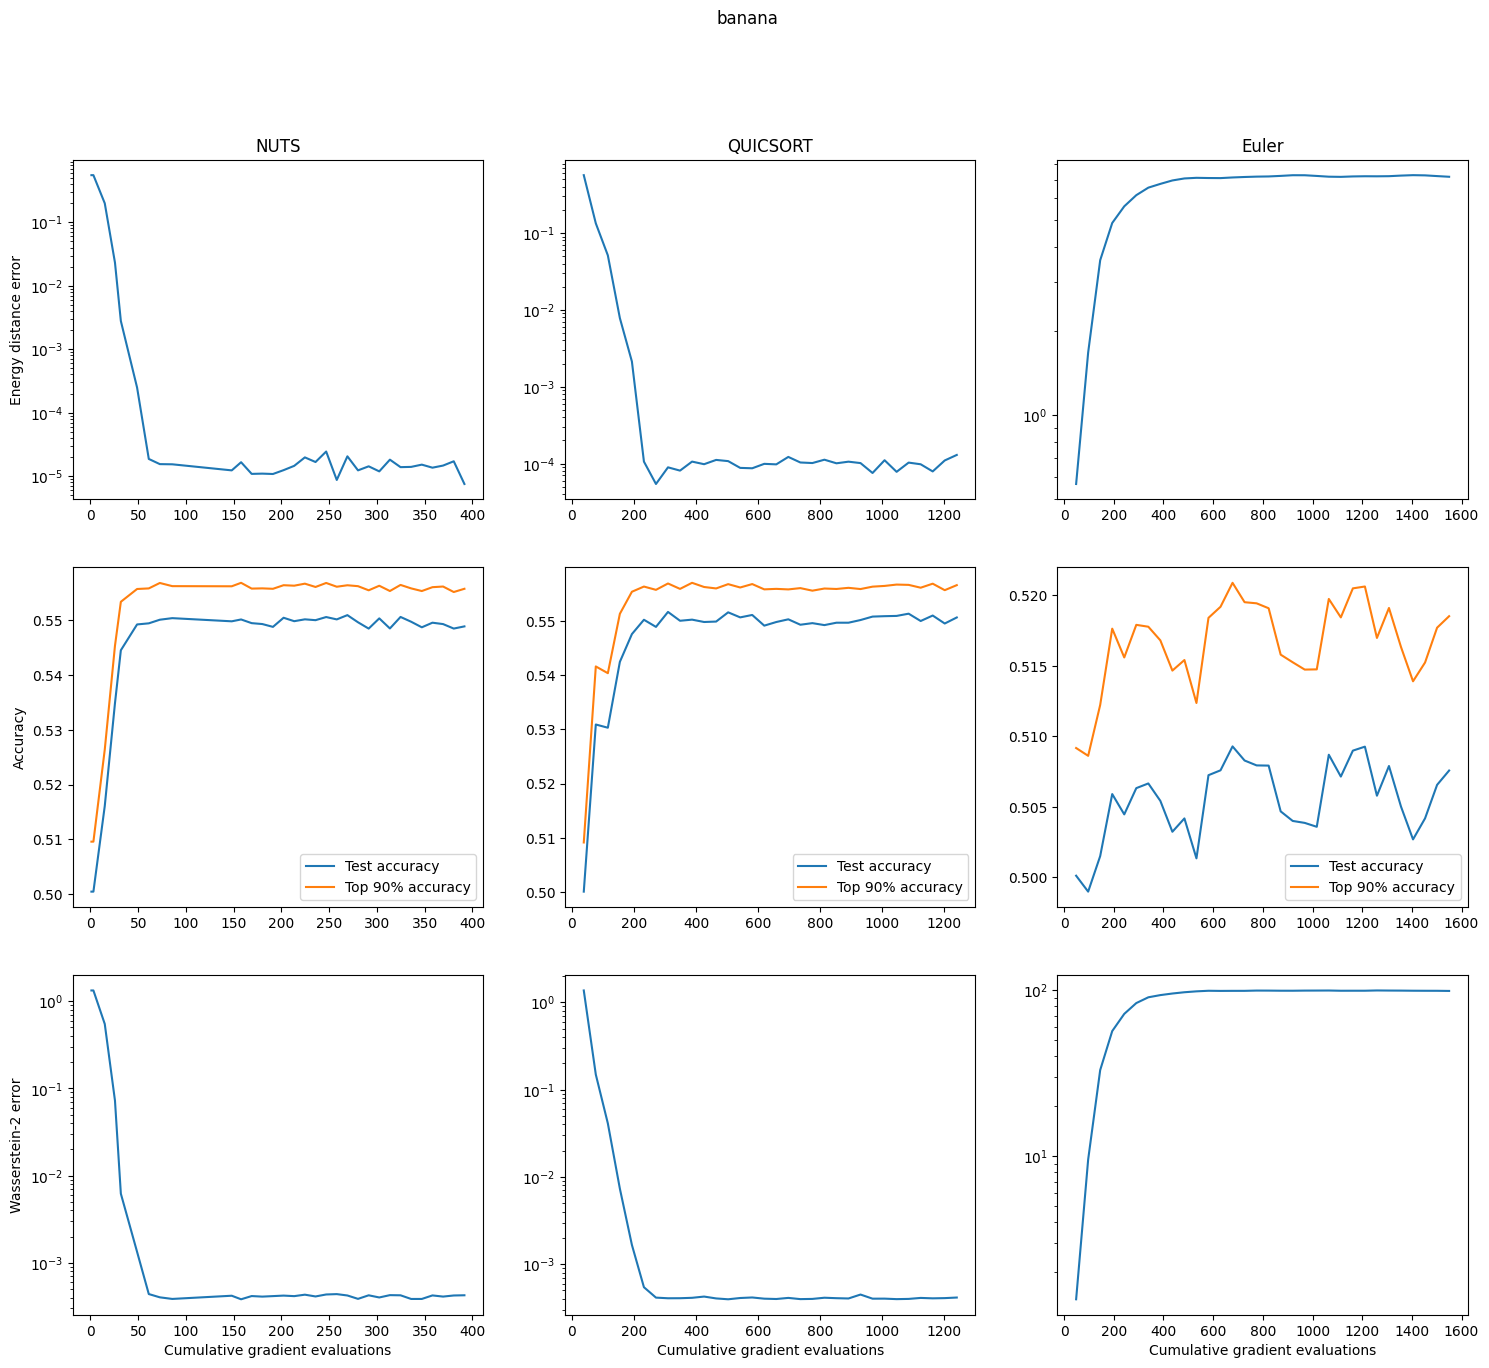

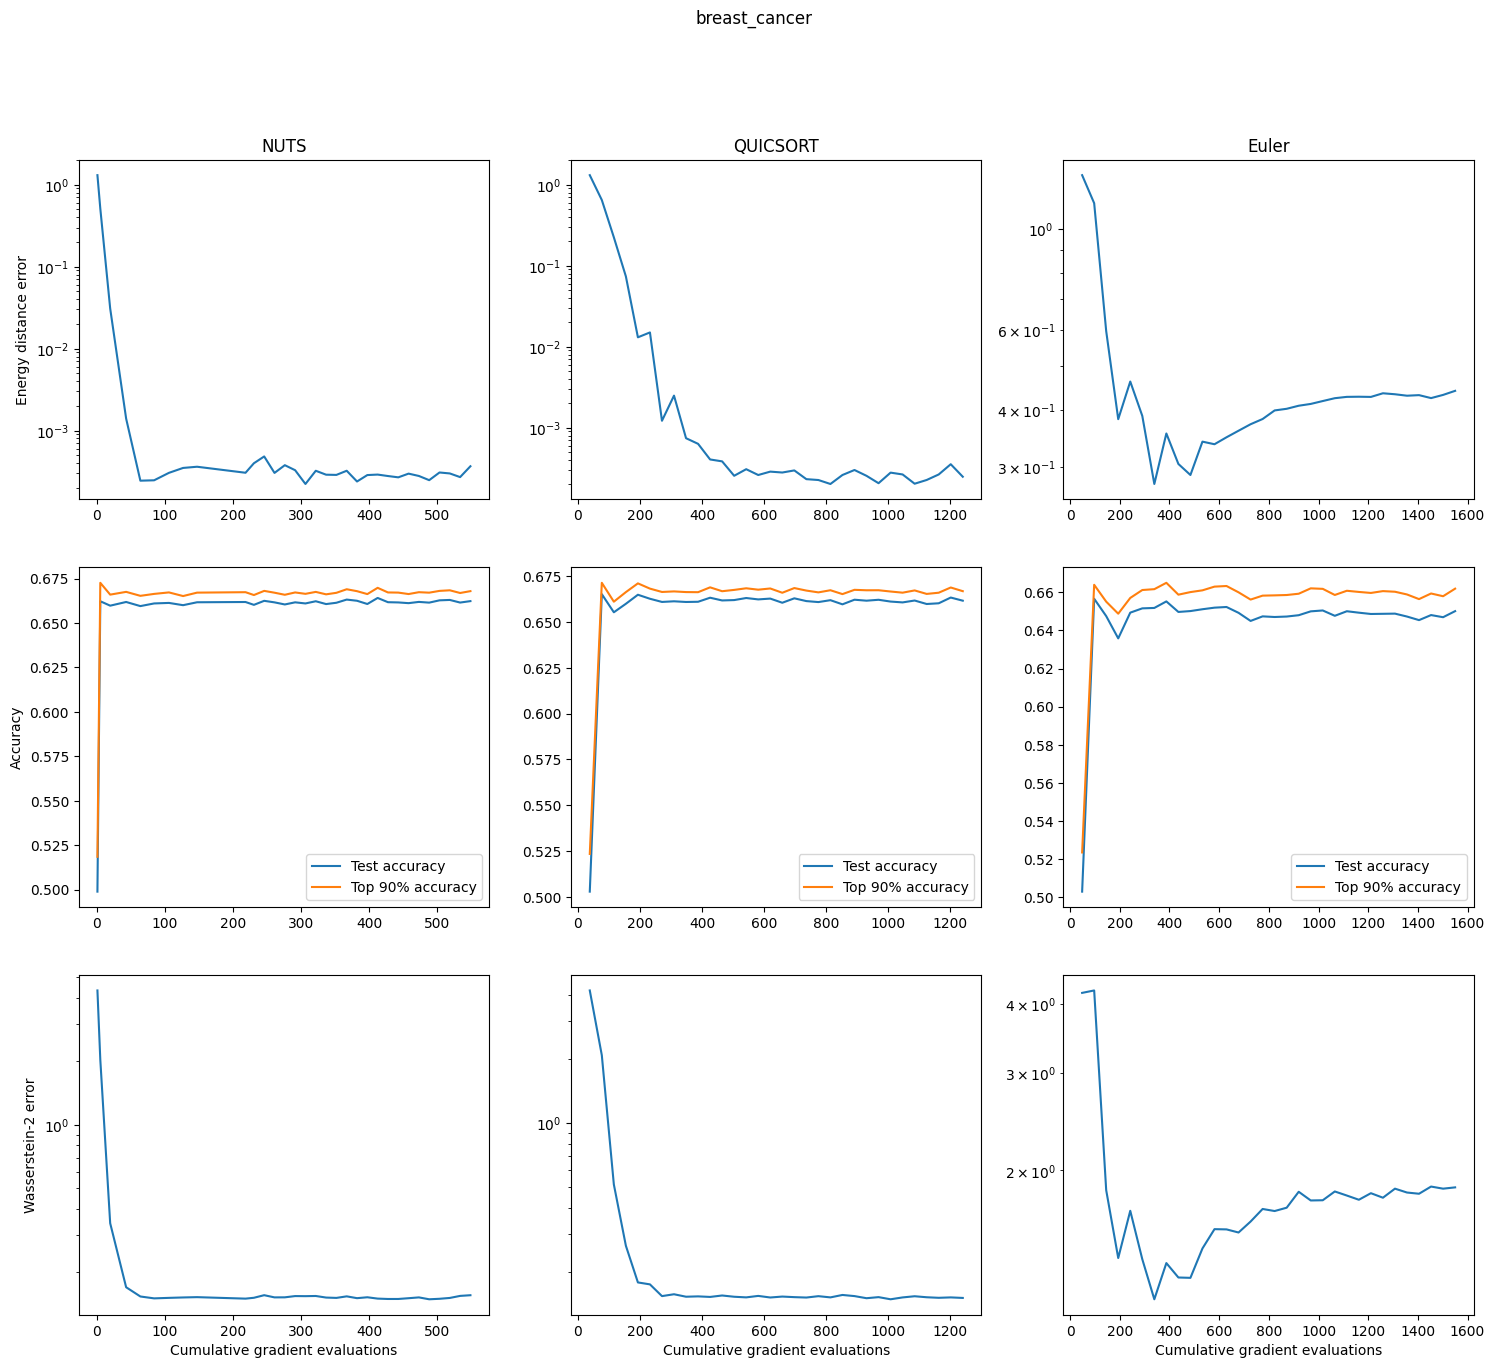

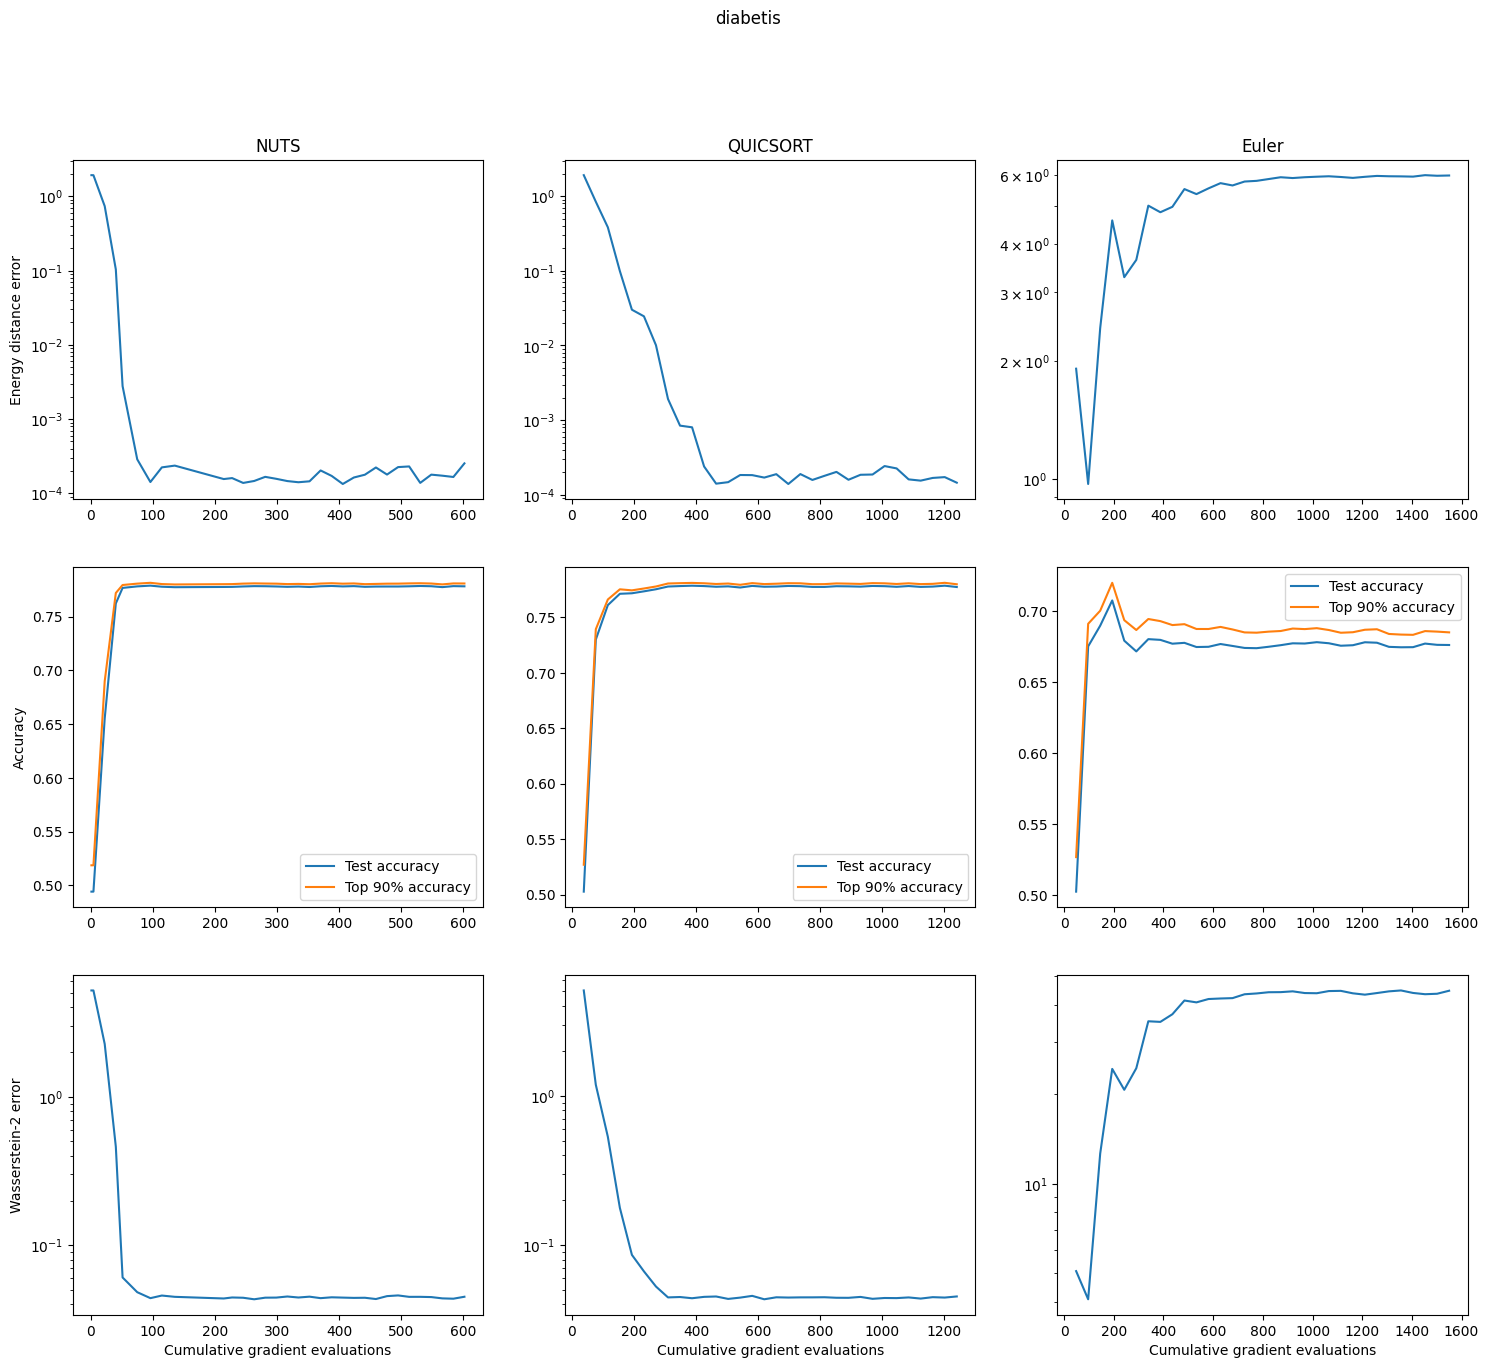

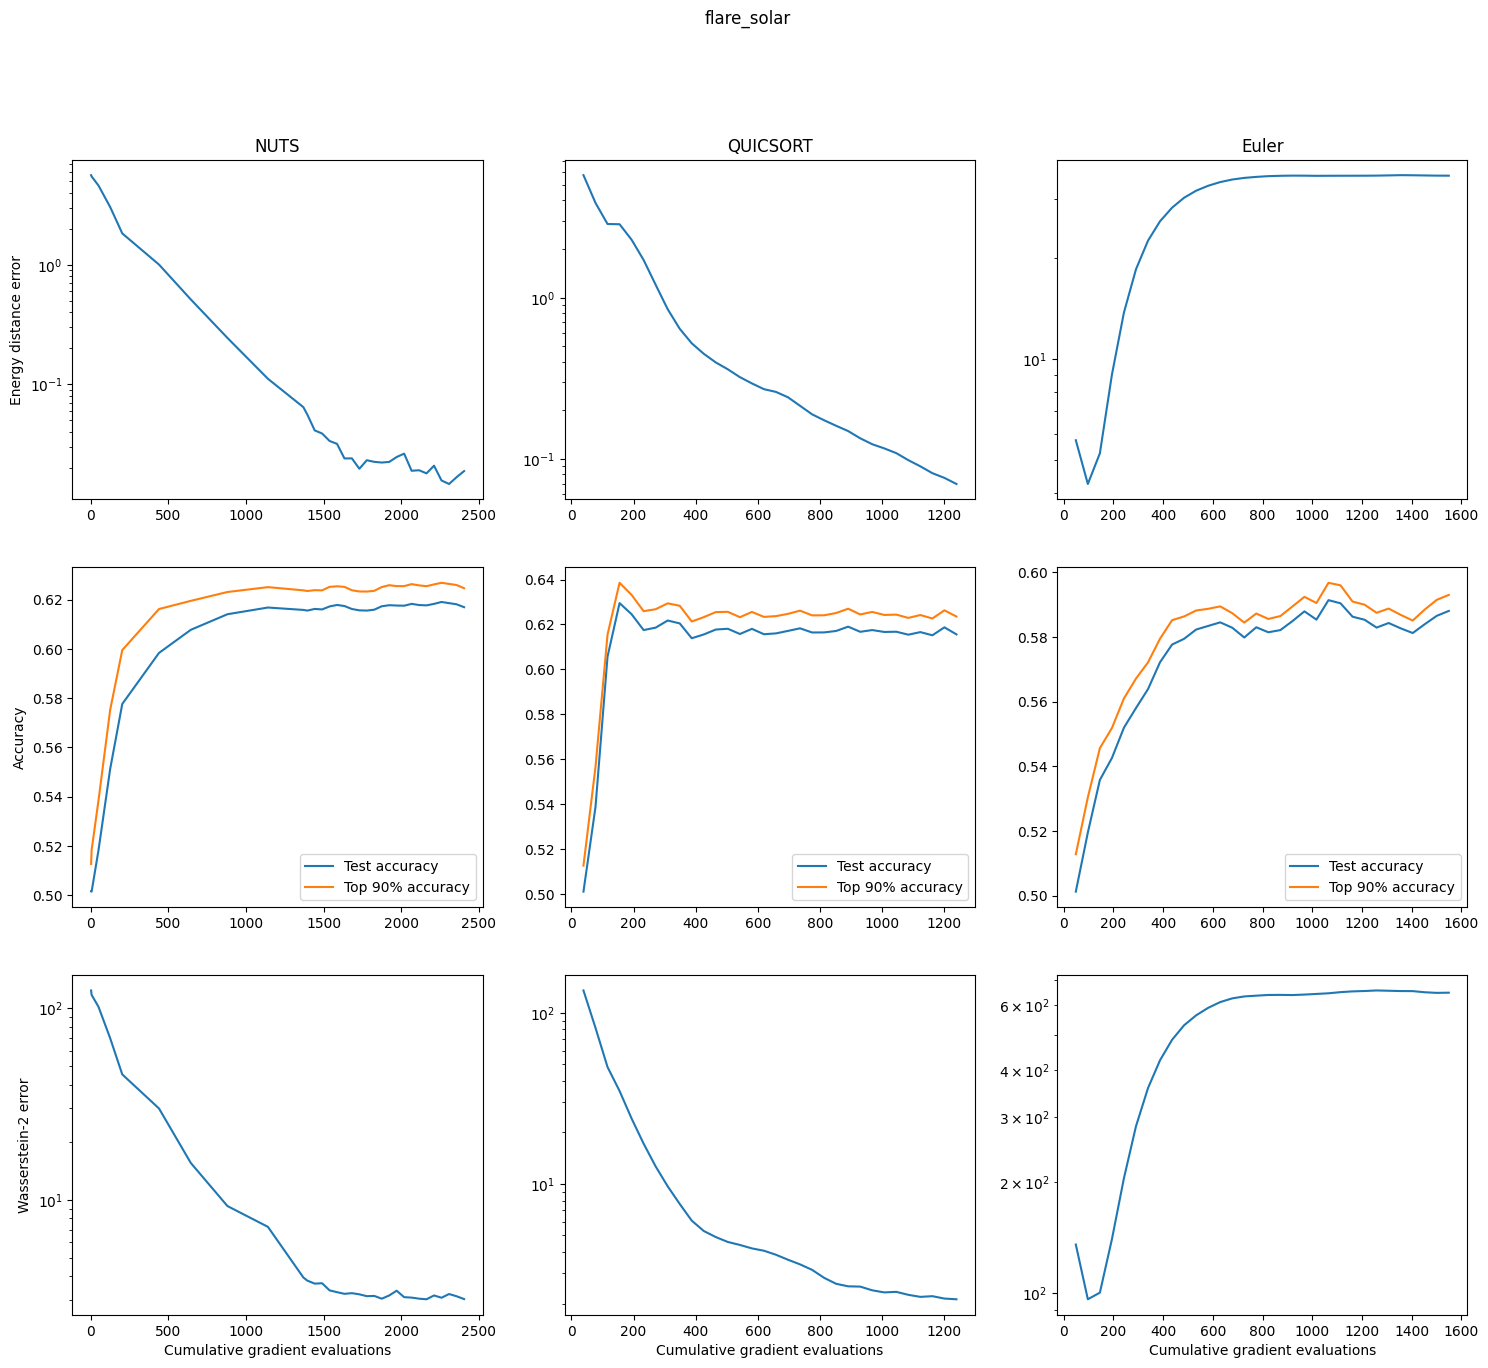

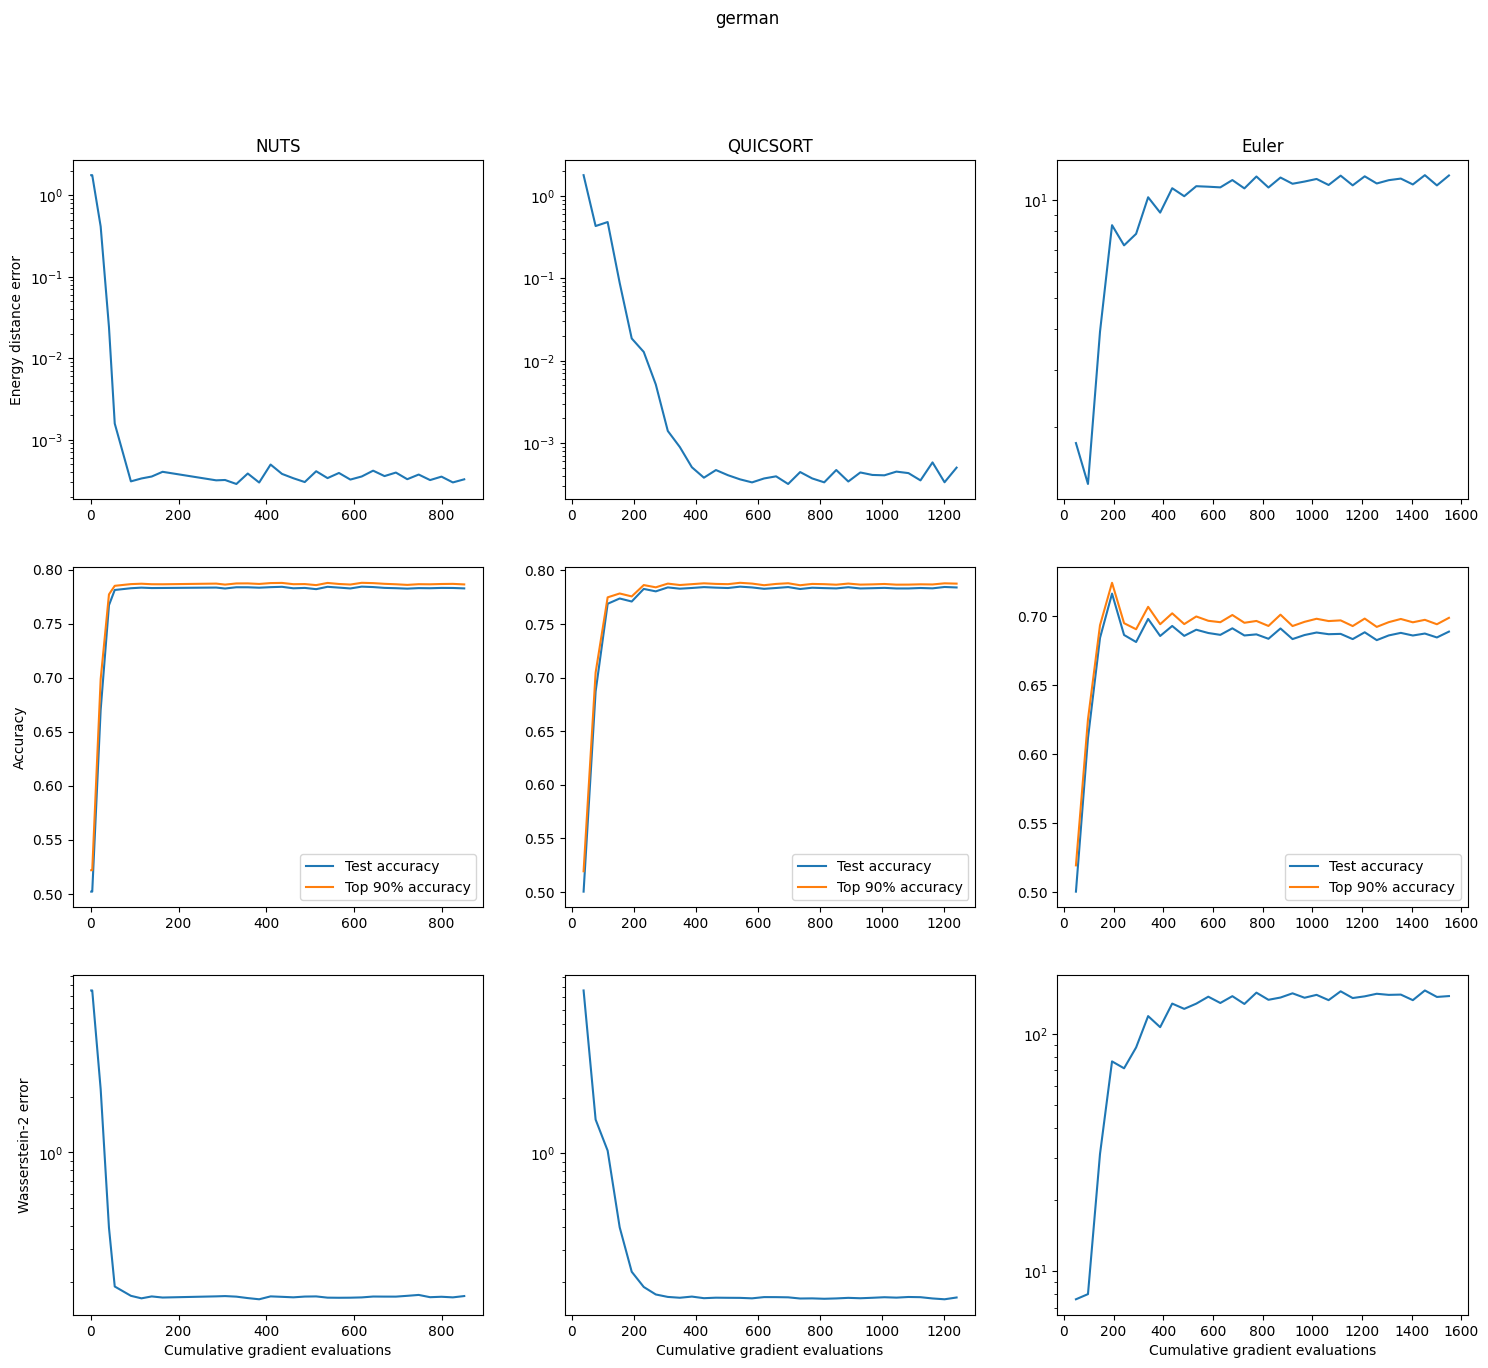

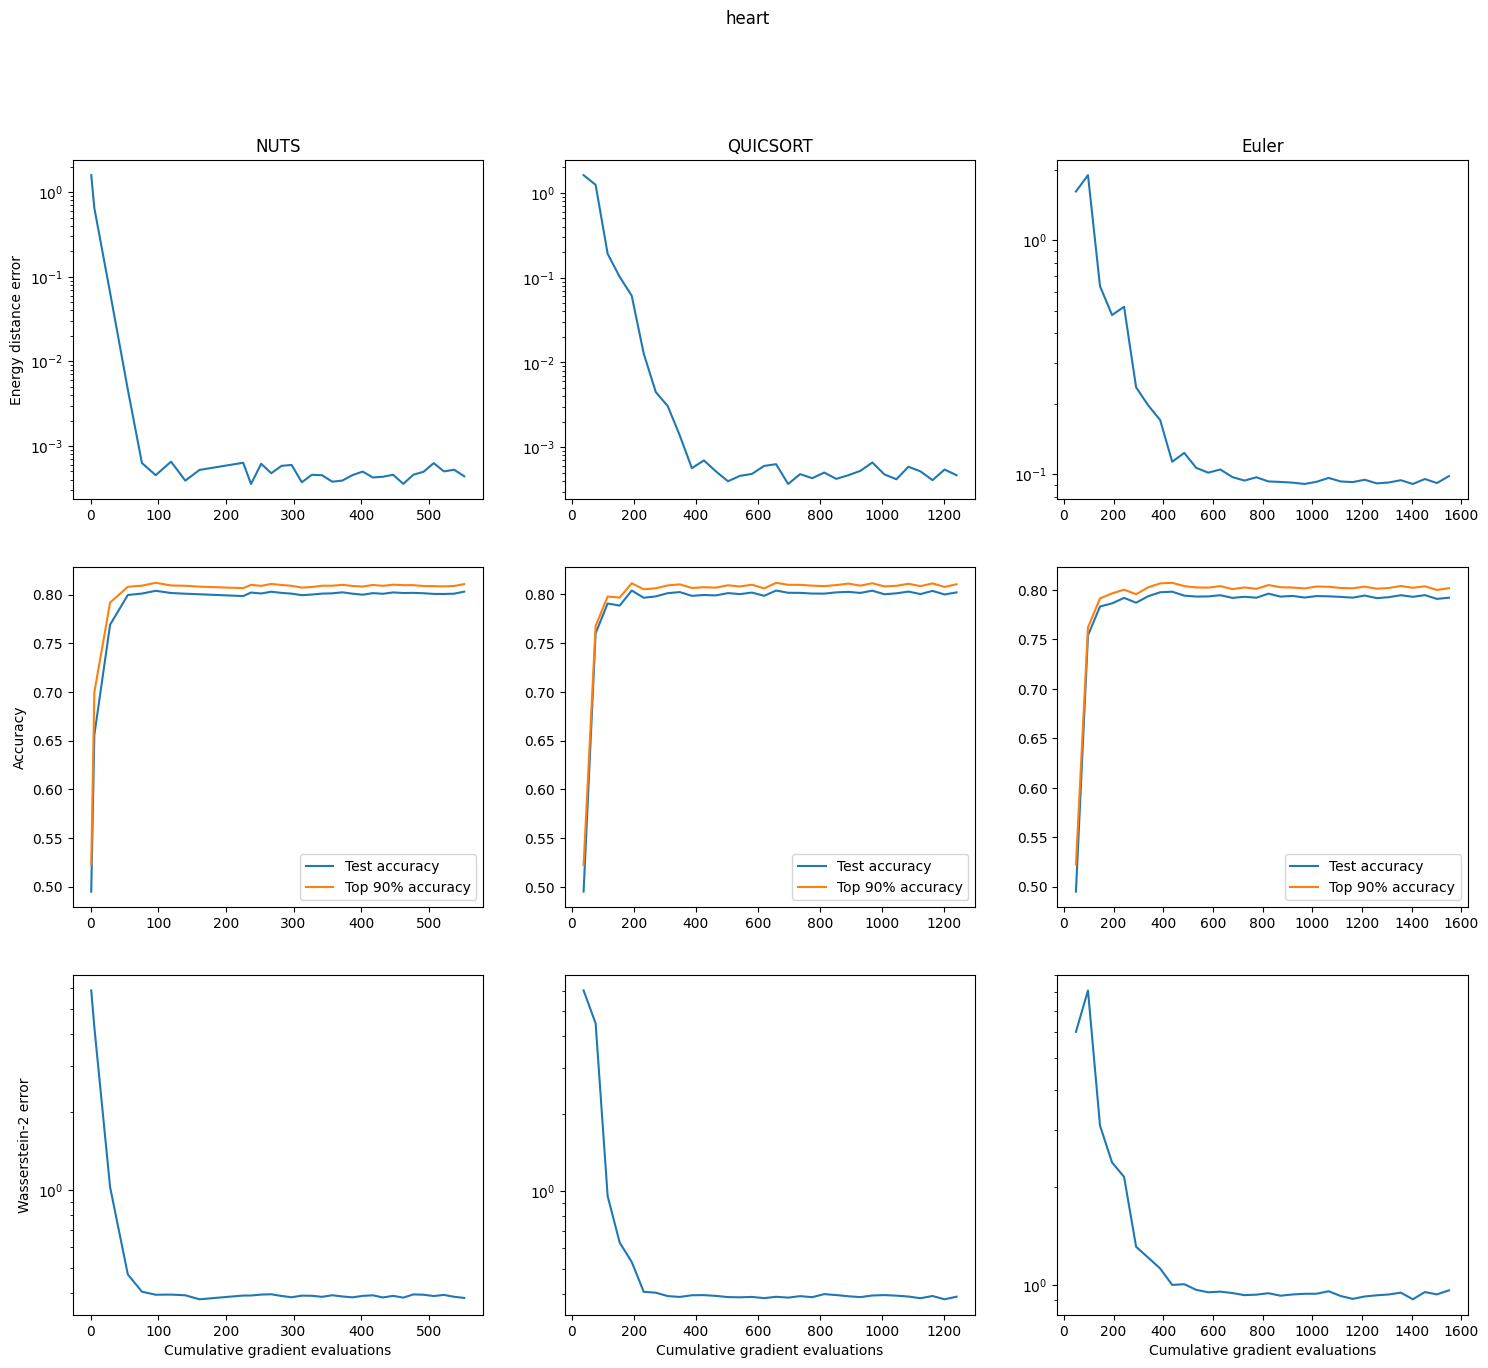

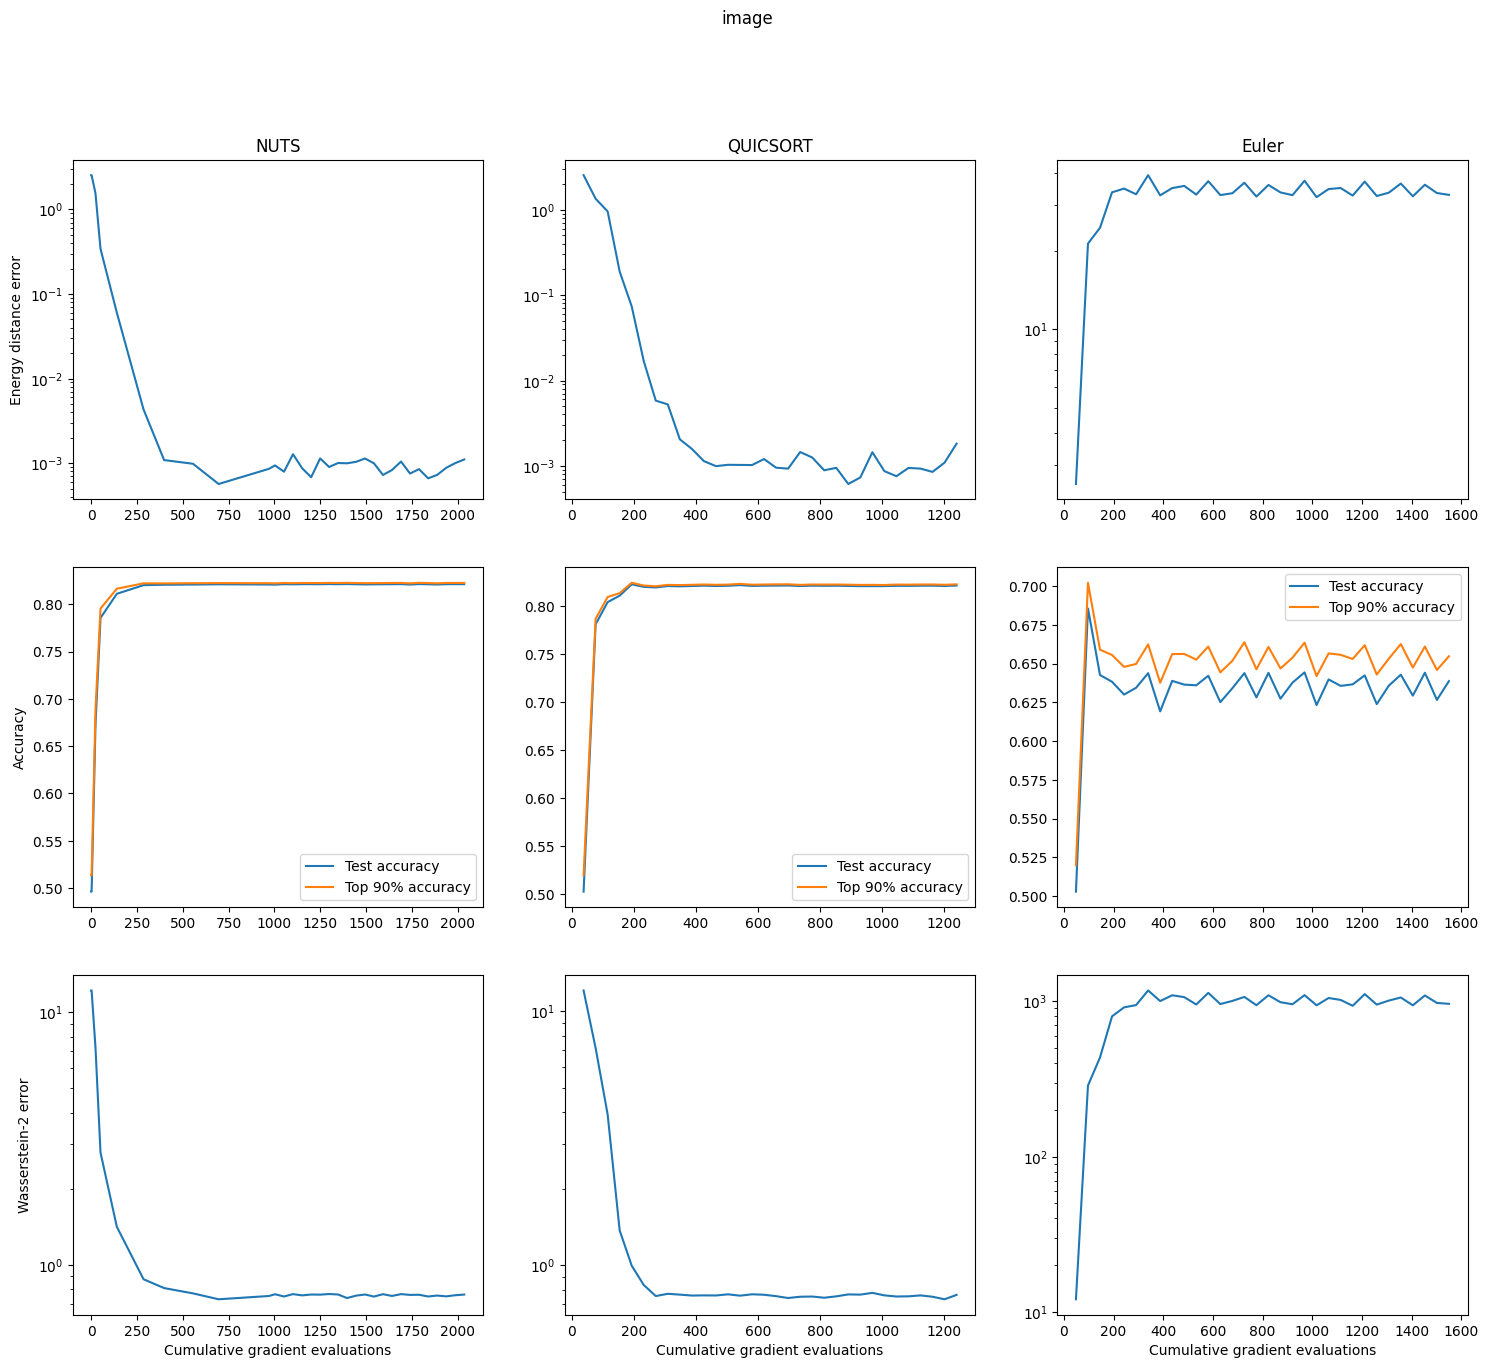

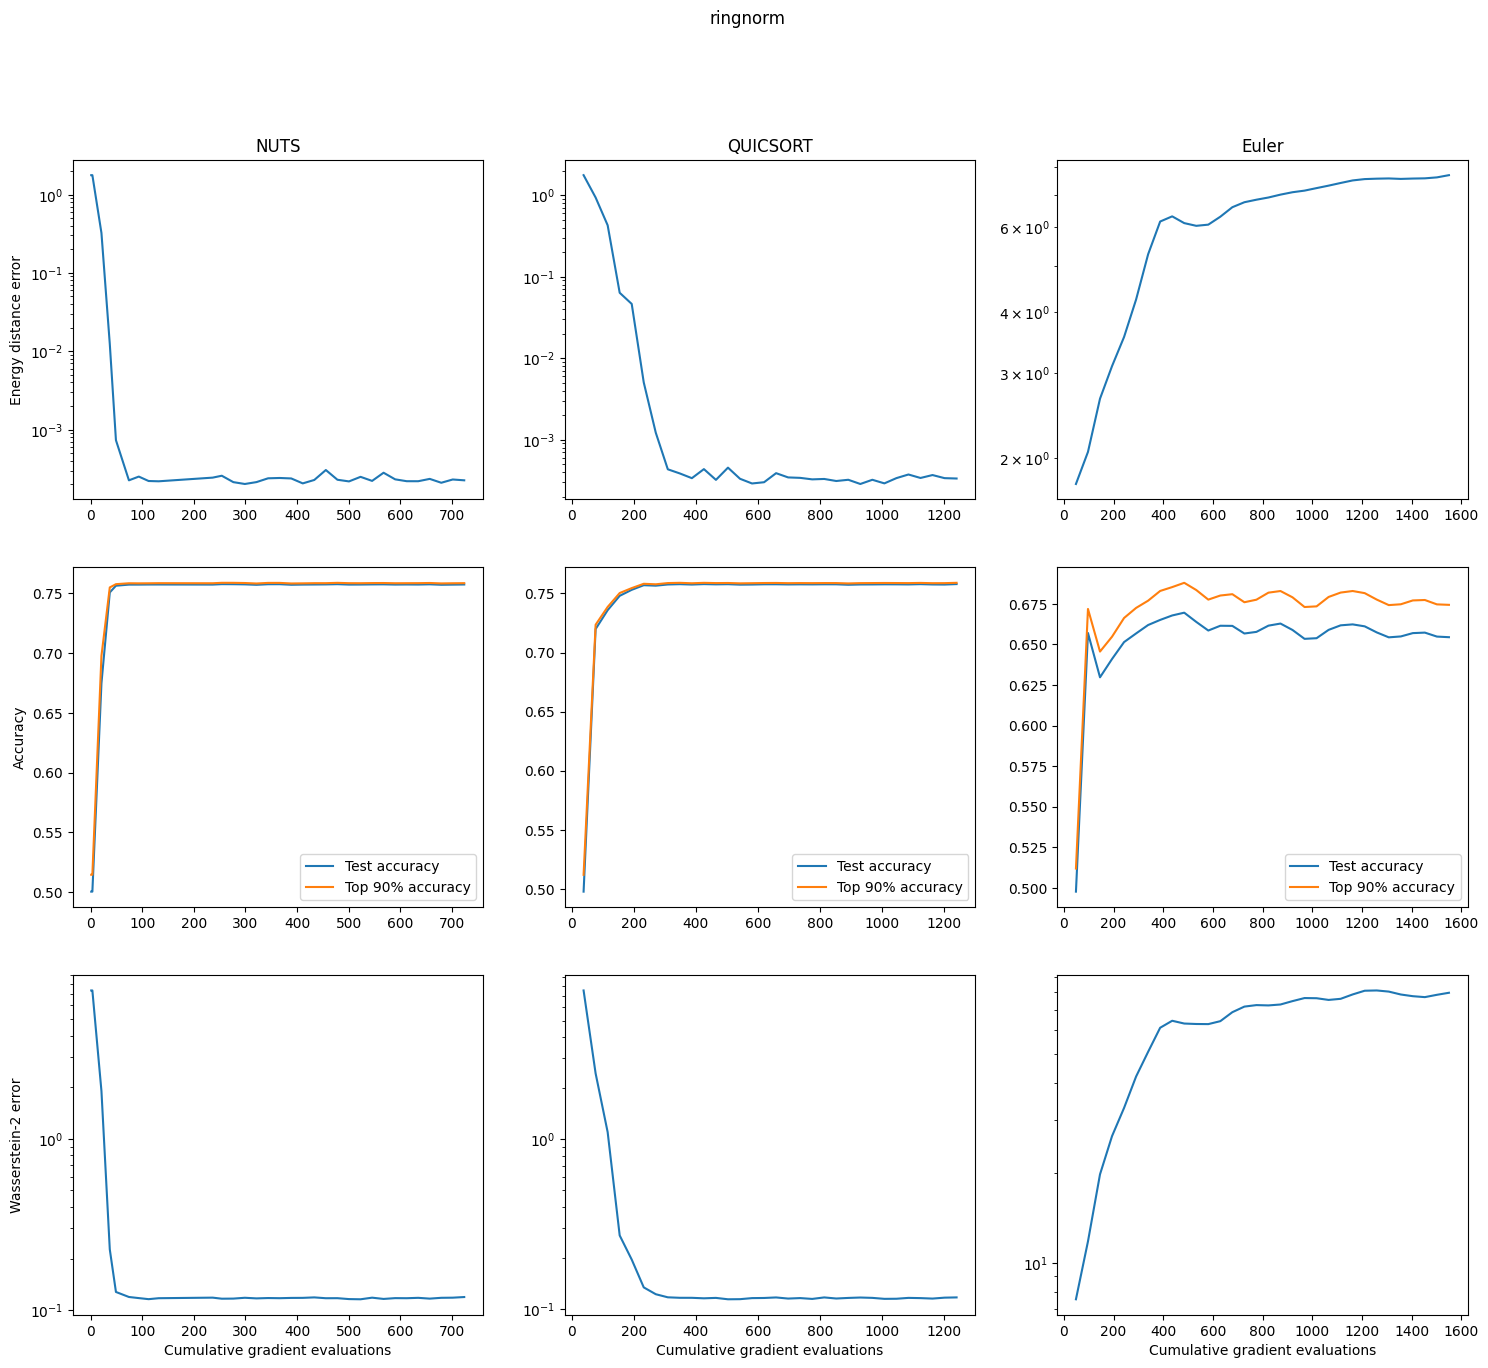

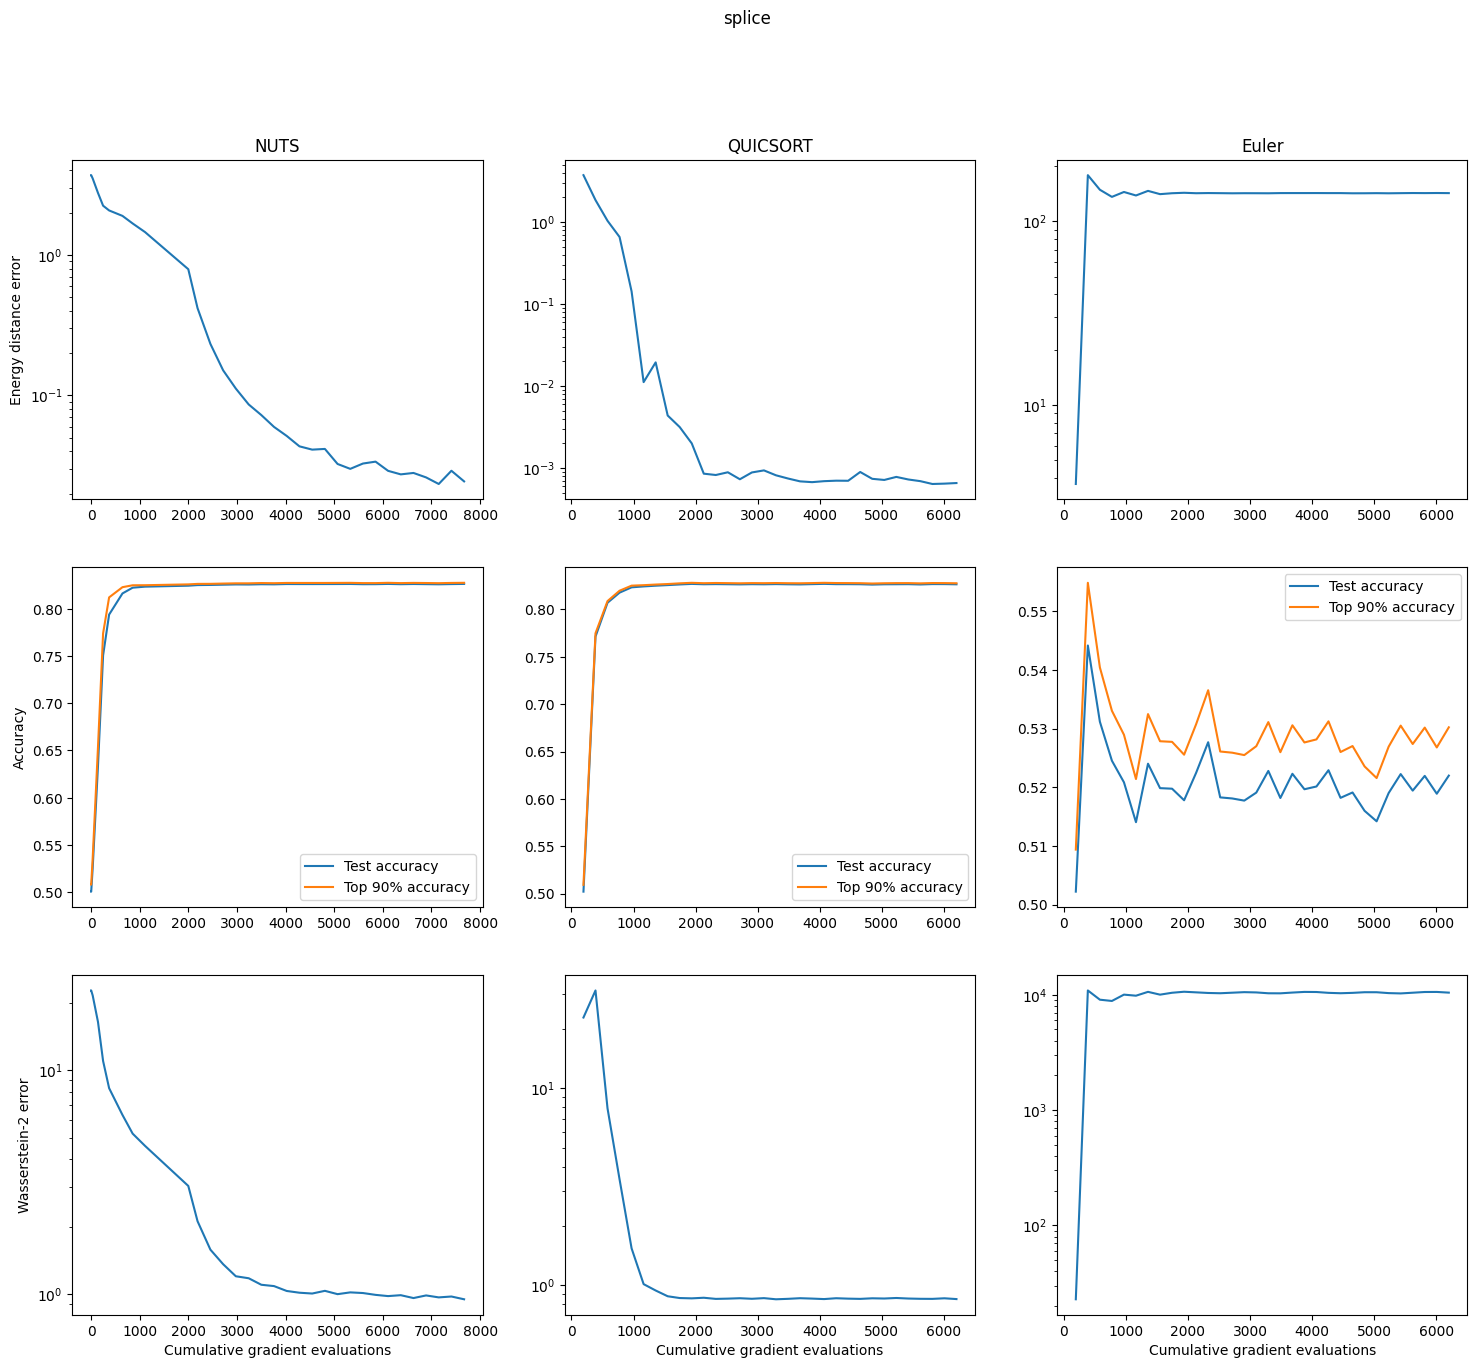

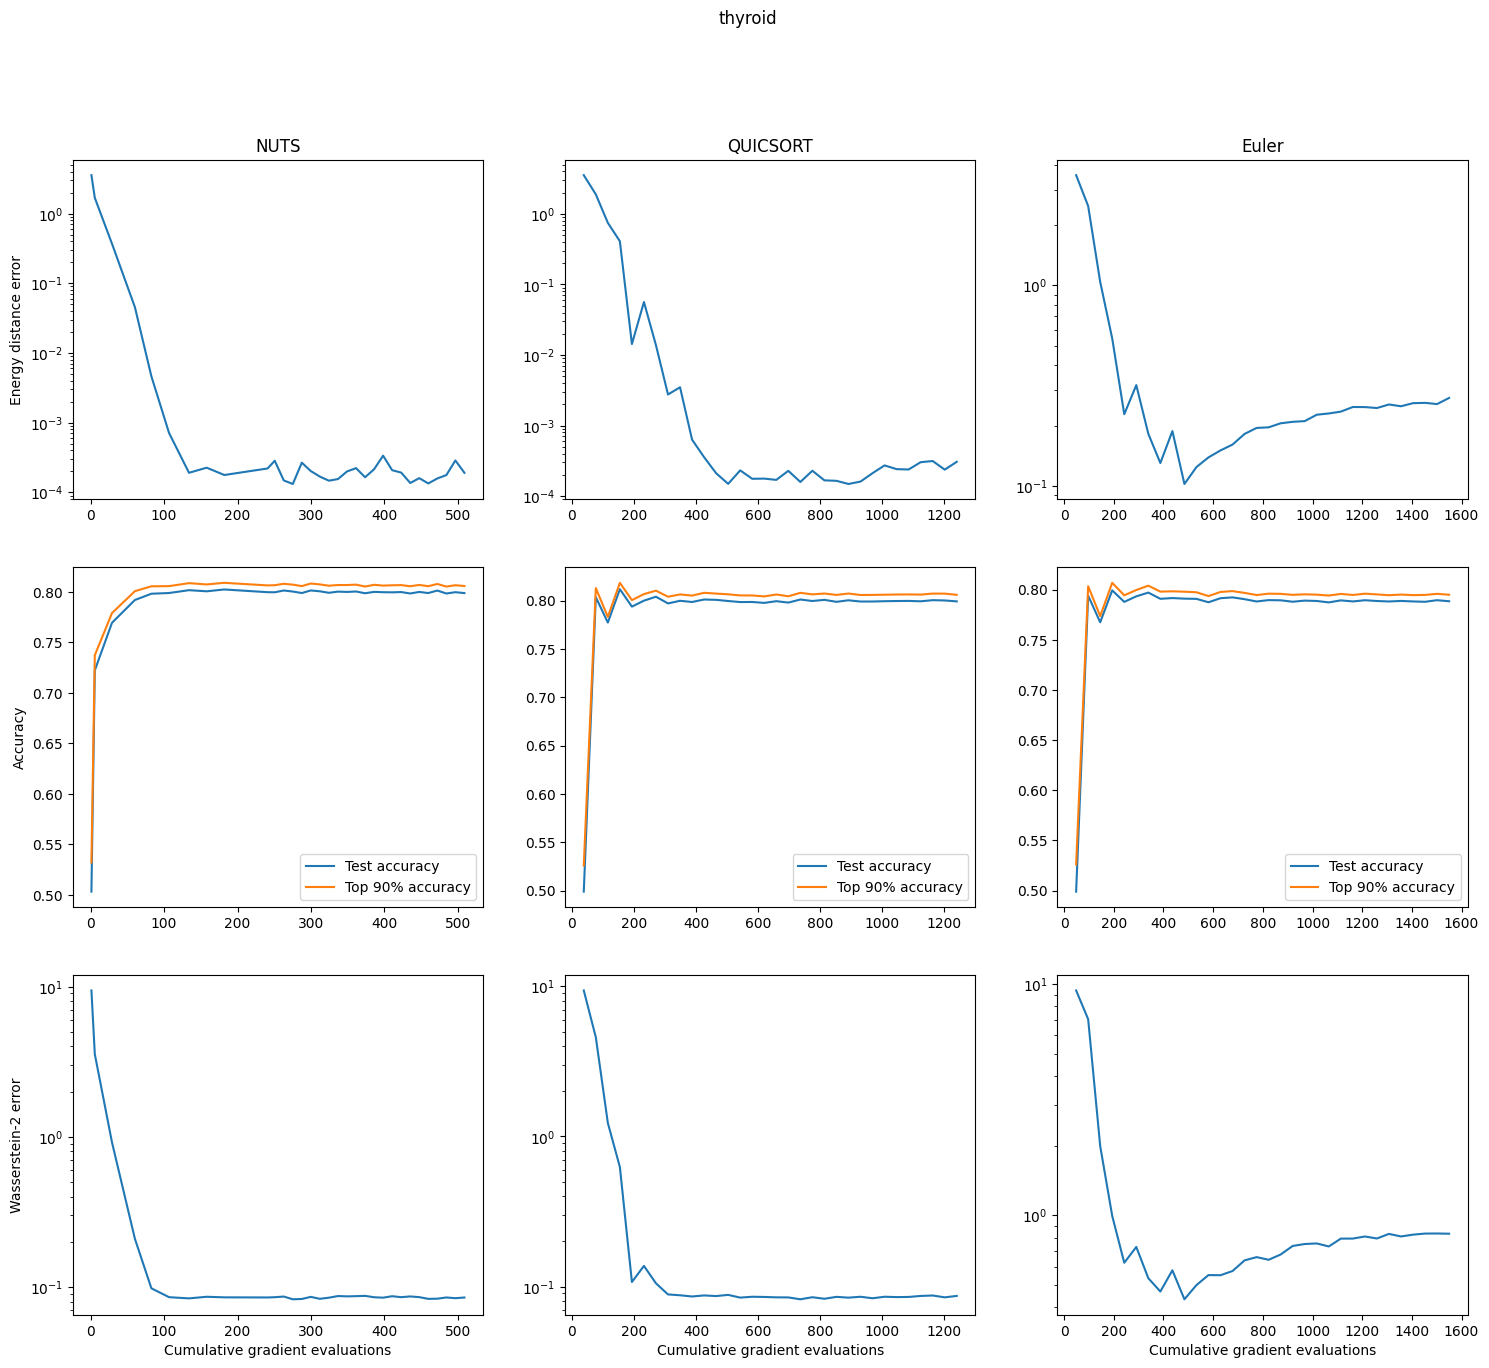

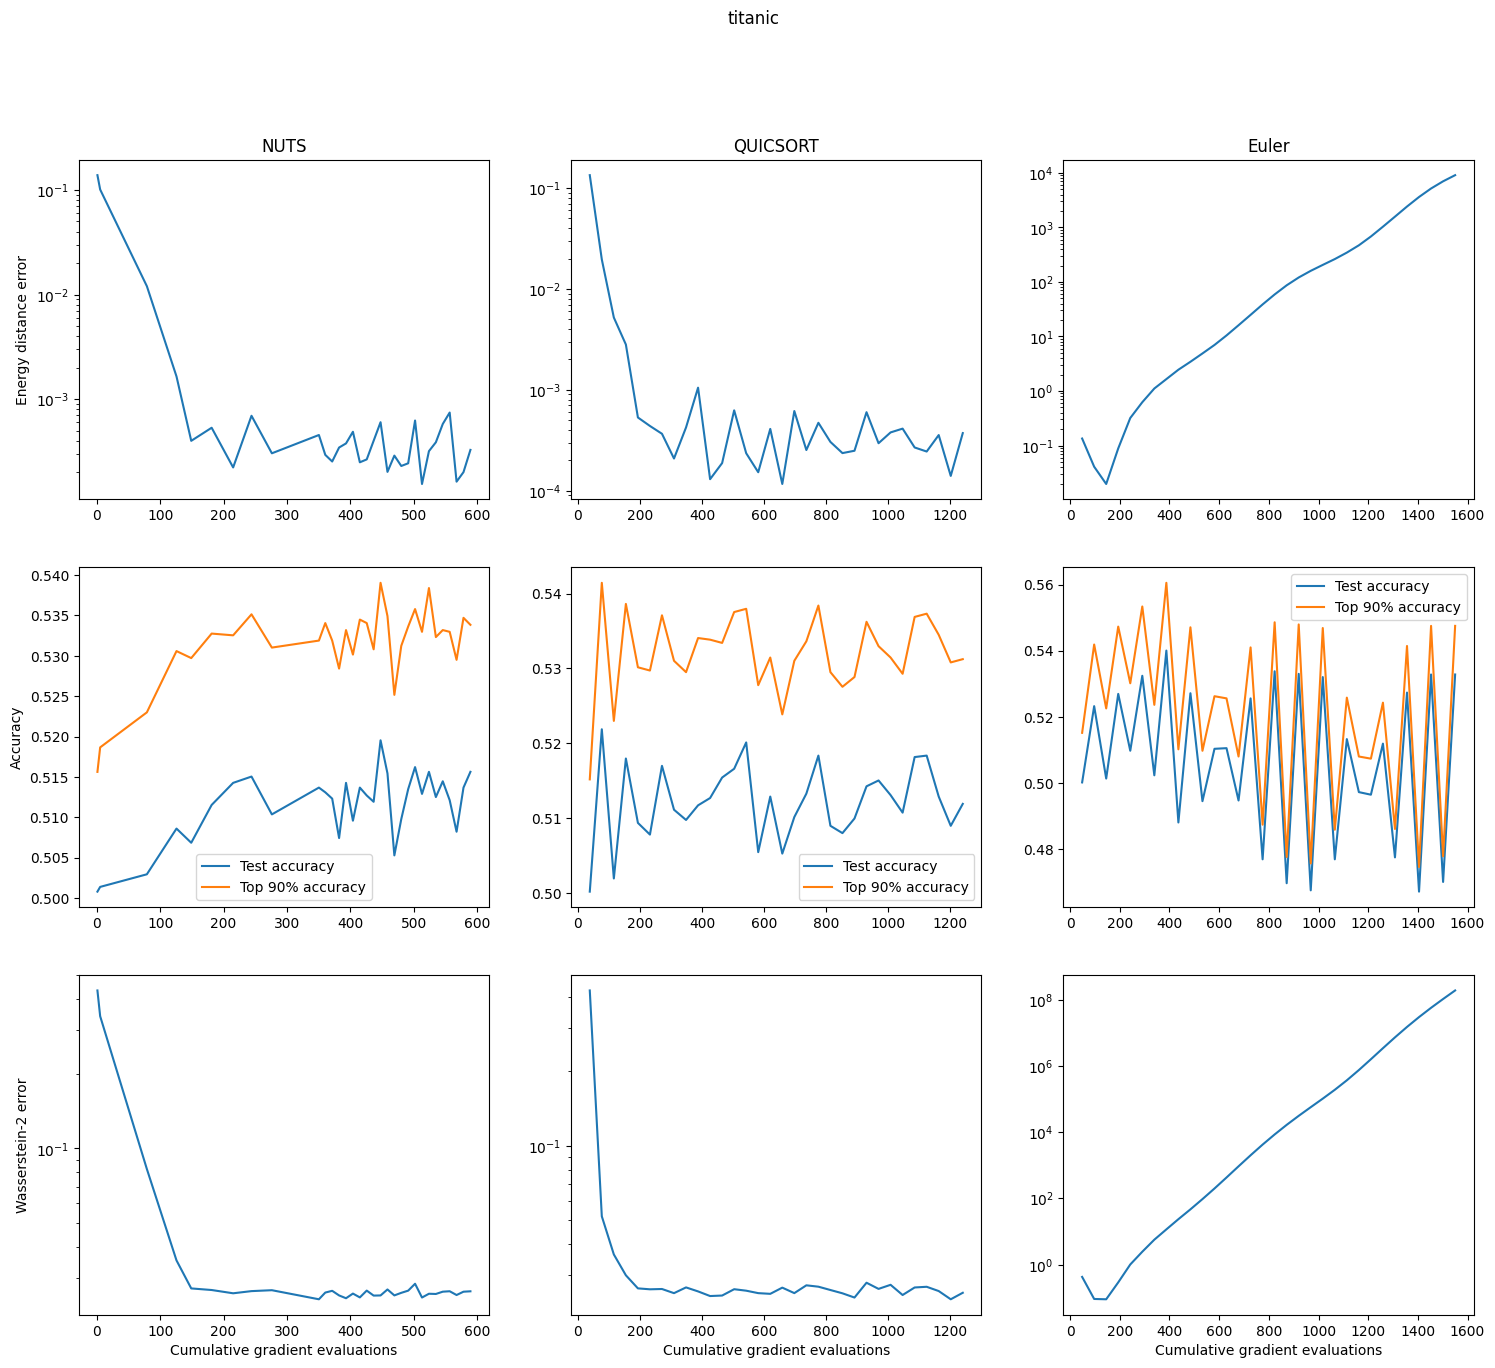

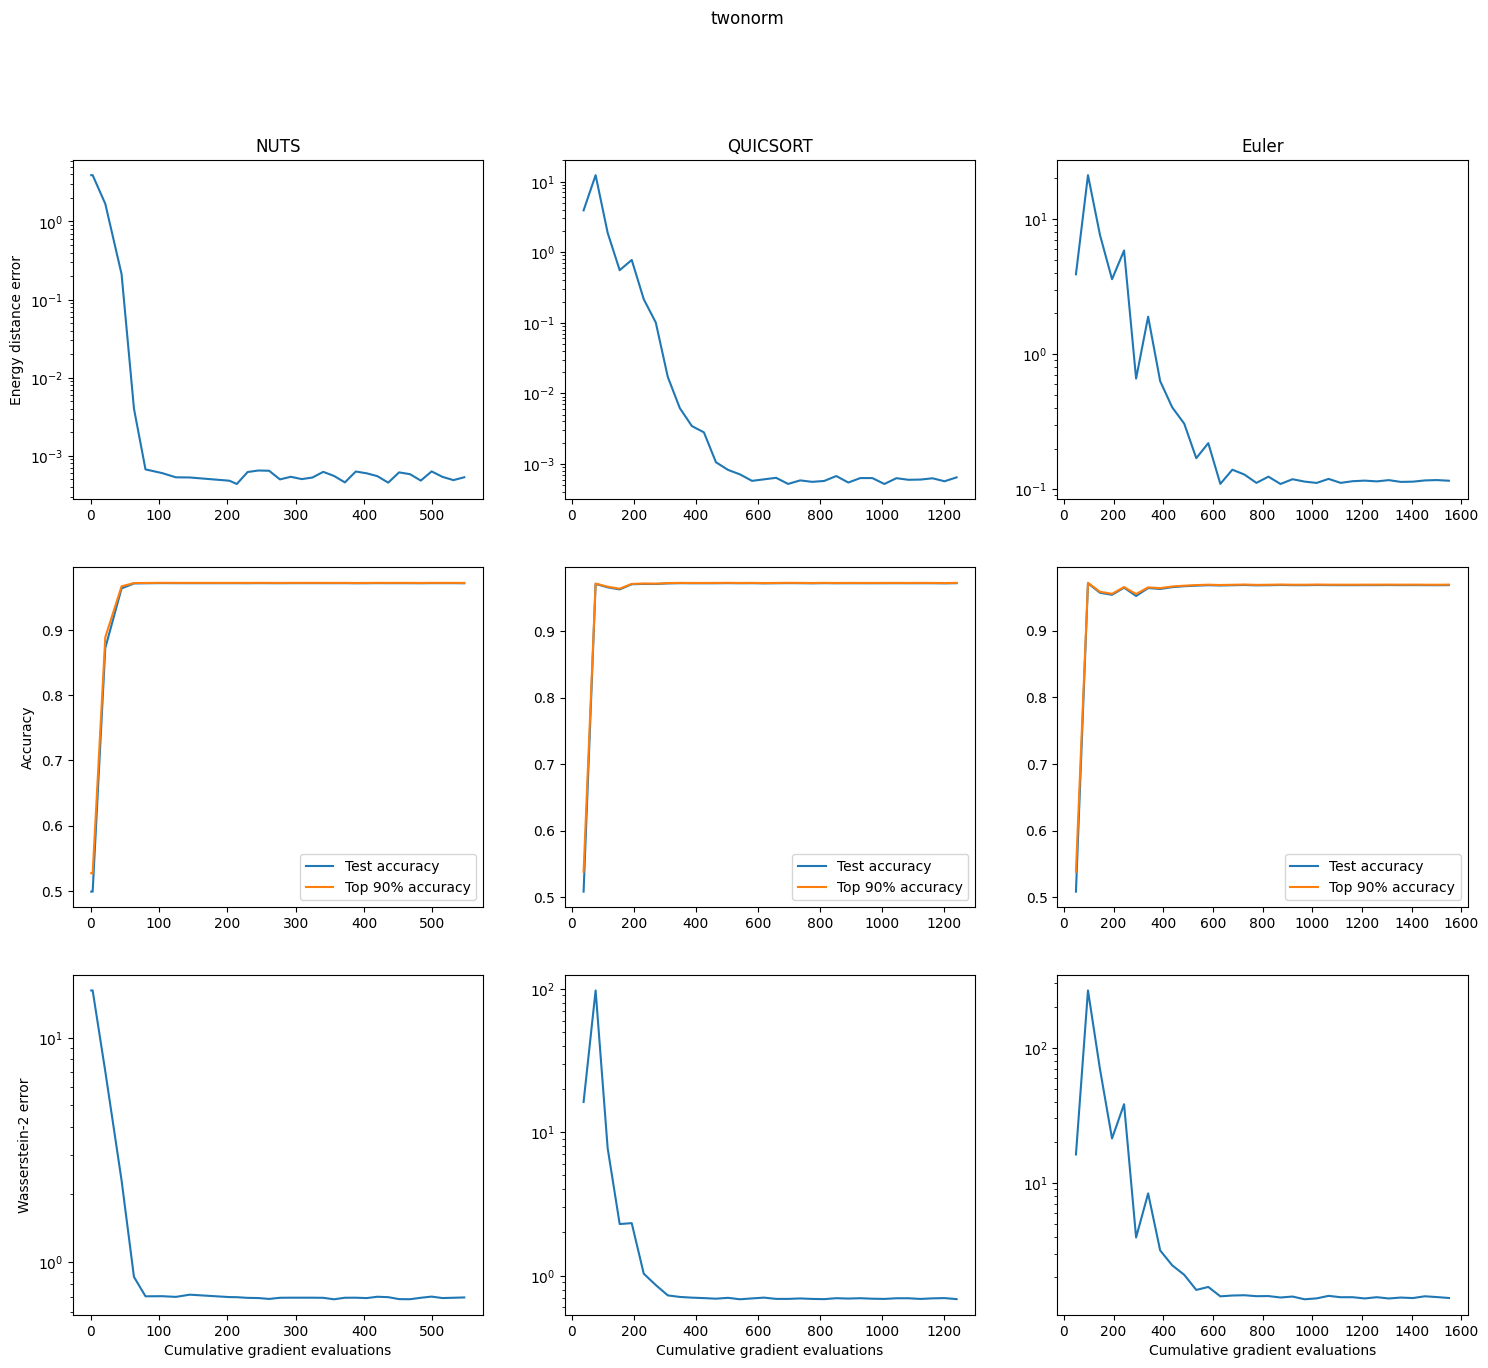

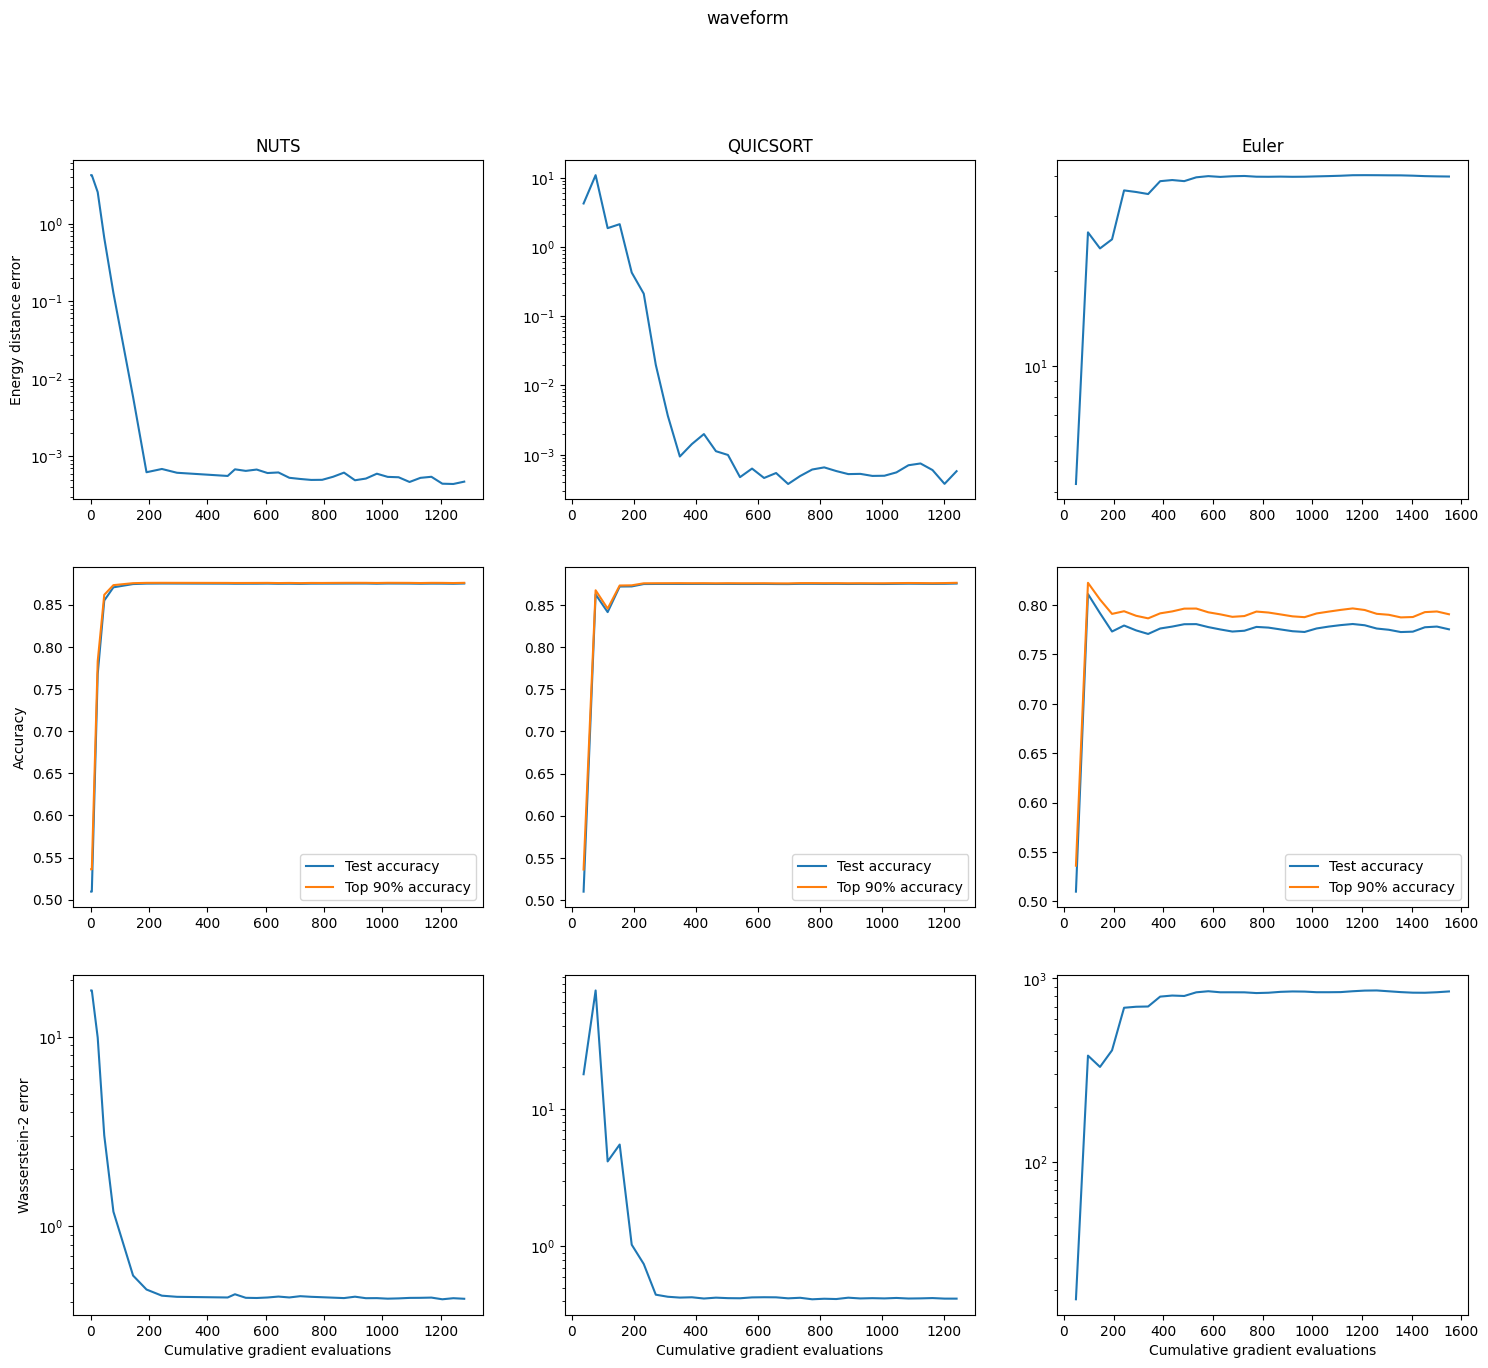

In [2]:
# open each results dict and make plots from it
import glob

from mcmc.progressive_plotting import make_figs


for name in names:
    # search for a file of the form
    # f"progressive_results/result_dict_{name}_{timestamp}.pkl"
    dict_filename = glob.glob(f"progressive_results/result_dict_{name}_*.pkl")[0]
    save_name = f"progressive_results/plots/fig_{name}.pdf"
    figs = make_figs(dict_filename, save_name)

In [2]:
timestamp = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
log_filename = f"progressive_results/log_{timestamp}.txt"
with open(log_filename, "w") as f:
    f.write(f"Results for time {timestamp}\n\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
for name in names:
    print(f"==================== {name} ====================")
    run_progressive_logreg(name, log_filename, timestamp)
    print()

==================== splice ====================
Data shape: (2991, 60)
GT energy bias: 8.853e-04, test acc: 0.8263, test acc top 90%: 0.8275


100.00%|██████████| [02:02<00:00,  1.22s/%]


QUICSORT acc: 0.8269, acc top 90%: 0.8281, energy: 6.407e-04, w2: 8.490e-01


100.00%|██████████| [03:04<00:00,  1.85s/%]


Euler acc: 0.5442, acc top 90%: 0.5549, energy: 3.713e+00, w2: 2.285e+01


sample: 100%|██████████| 44/44 [09:16<00:00, 12.64s/it]


NUTS acc: 0.8263, acc top 90%: 0.8275, energy: 2.341e-02, w2: 9.465e-01

